In [108]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import random as rnd
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [2]:
data = pd.read_csv('../cleaned_data/2015_data.csv')

## How does literacy affect life expectancy?

### Visualizing some basic things about the data on life expectancy and education levels

In [4]:
data.head()

,education_2003_revision,month_of_death,sex,detail_age,place_of_death_and_decedents_status,marital_status,injury_at_work,manner_of_death,method_of_disposition,autopsy,358_cause_recode,113_cause_recode,39_cause_recode,race,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode
0,3.0,1,M,84,1,M,U,7.0,B,N,230,67,22,1,1,1,100,6
1,6.0,1,M,70,1,M,U,7.0,C,N,93,27,8,1,1,1,100,6
2,3.0,1,F,91,4,W,U,7.0,C,N,189,52,17,1,1,1,100,6
3,3.0,1,F,40,4,S,N,3.0,B,Y,434,129,41,3,2,3,100,8
4,5.0,1,F,89,6,W,U,7.0,C,N,214,62,21,1,1,1,100,6


In [5]:
edu = data.dropna(subset=['education_2003_revision'])

In [7]:
education = {}
for ind in edu.index:
    if edu["education_2003_revision"][ind] not in education:
        education[edu["education_2003_revision"][ind]] = 1
    else:
        education[edu["education_2003_revision"][ind]] += 1
print(education)

{3.0: 1077604, 6.0: 261106, 5.0: 154326, 4.0: 315364, 9.0: 119831, 2.0: 278916, 1.0: 290342, 8.0: 43688, 7.0: 103978}


In [8]:
fractions = [round(n / len(data), 2) for n in education.values()]
fractions

[0.4, 0.1, 0.06, 0.12, 0.04, 0.1, 0.11, 0.02, 0.04]

In [9]:
labels = ["High school graduate/GED completed", "Bachelor's degree", "Associate degree", "Some college credit", "Unknown", "9-12th grade", "Less than 8th grade", "Doctorate/professional degree", "Master's degree"]

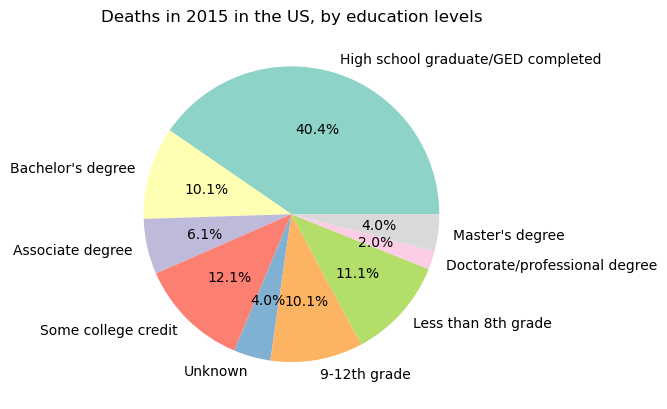

In [10]:
plt.pie(fractions, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title("Deaths in 2015 in the US, by education levels")
plt.show() 

In [11]:
# dropping all rows with the age as 999, which is obviously wrong
age = data.drop(data[data['detail_age'] == 999].index)

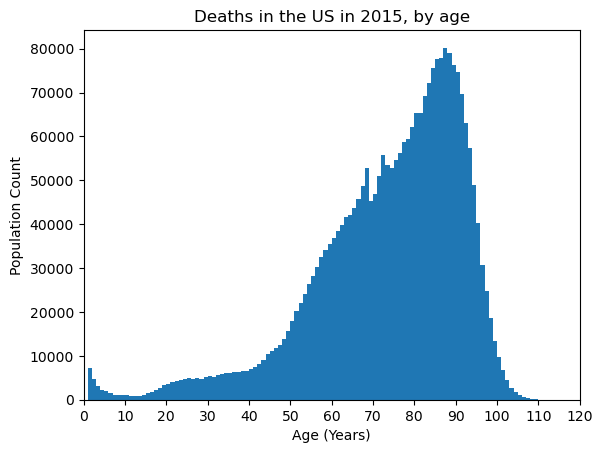

In [12]:
max_age = age['detail_age'].max()
fig, ax = plt.subplots()
n, bins, patches = ax.hist(data["detail_age"], bins=np.arange(0, max_age + 1, 1))
plt.xlim(0, max_age + 1)
ax.plot()
plt.xlabel("Age (Years)")
plt.xticks(np.arange(0, 130, 10))
plt.ylabel("Population Count")
plt.title("Deaths in the US in 2015, by age")
plt.show()

In [14]:
life_expectancy = age['detail_age'].mean()
life_expectancy

73.27094773181457

### Plotting age of death against level of education

In [15]:
# arbitrarily drop all columns that have either education as unknown or age as 999, which is a code not overed in the documentation, which can be assumed to mean NaN
edu_age = age.drop(age[age['education_2003_revision'] == 9].index)

In [16]:
# checking that drop was successful
print(edu_age['education_2003_revision'].max()) # should be 8
print(edu_age['detail_age'].max()) # should be 116

8.0
116


In [97]:
# manually creating the legend for the plot below with the documentation
colors = sns.color_palette('Set3')
labels = ["1: 8th grade or less", "2: 9 - 12th grade", "3: High school graduate\nor GED completed", "4: Some college credit", "5: Associate degree", "6: Bachelor's Degree", "7: Master's degree", "8: Doctorate or\nprofessional degree"]
legends = []
for c, l in zip(colors, labels):
    patch = mpatches.Patch(color=c, label=l)
    legends.append(patch)    

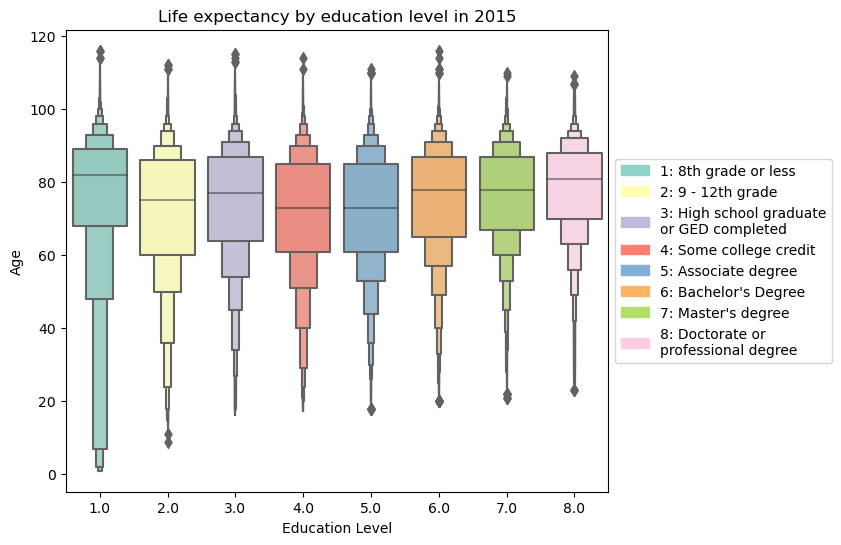

In [98]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot()

sns.boxenplot(x="education_2003_revision", y="detail_age", data=edu_age, palette=sns.color_palette('Set3'));

plt.xlabel("Education Level")
plt.ylabel("Age")
plt.title("Life expectancy by education level in 2015")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])

ax.legend(handles=legends, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [99]:
# attempting to get a clearer picture of the data via a simple scatter plot
avg_age = edu_age.groupby('education_2003_revision')['detail_age'].mean()

In [100]:
# manually creating the legend for the plot below with the documentation
colors_scatter = sns.color_palette('Set1')
legend_scatter = []
for c, l in zip(colors_scatter, labels):
    patch = mpatches.Patch(color=c, label=l)
    legend_scatter.append(patch)  

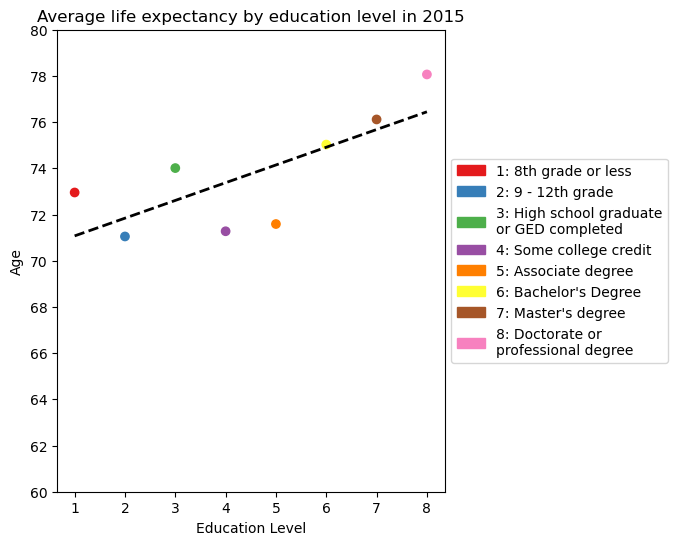

In [104]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot()

x = np.arange(1, 9, 1)
z = np.polyfit(x, avg_age, 1)
p = np.poly1d(z)

plt.scatter(x, avg_age, c=sns.color_palette('Set1')[:8])
plt.plot(x, p(x), color="black", linewidth=2, linestyle="--")

plt.xlabel("Education Level")
plt.ylabel("Age")
plt.yticks(np.arange(60, 81, 2))
plt.title("Average life expectancy by education level in 2015")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.5, box.height])

ax.legend(handles=legend_scatter, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [106]:
# calculating Pearson's correlation coefficient
corr, _ = pearsonr(x, avg_age)
corr

0.7445031399338156

## Conclusion

Generally, higher levels of education correlates to higher life expectacy, with people with Doctorates / Professional degrees having the highest life expectacy among those who passed away if 2015, and those with Master's degrees having the second highest life expectancy. This is hypothesized to be due to increased income and better accesibility to medical knowledge, which might allow a person to catch certain diseases in the early stages, allowing for better recovery. 

Another interesting pattern in the data is that the life expectancies of those with education levels 8th grade or below has a abnormally high variance compared to the other education levels in the data. 